In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
from NeuralNetworks import *
from numerical_integration import *
from tqdm import tqdm
from Kepler import *
from Training import *
torch.set_default_dtype(torch.float32)

torch.random.manual_seed(1)
np.random.seed(33)

plt.rcParams['font.size'] = 12
plt.rcParams['lines.markersize'] = 10
plt.rcParams['legend.fontsize'] = 10
colors = sns.color_palette([(0.6,0.8,.8), (1,0.7,0.3), (0.2,0.7,0.2), (0.8,0,0.2), (0,0.4,1), (0.6,0.5,.9), (0.5,0.3,.5)])

In [2]:
def initial_condition():
        def sampler():

            H0 = np.random.uniform(-1.5,-1e-3)
            e = np.random.uniform(0.1,0.8)
            a = -1/(2*H0)

            while True:
                H0 = np.random.uniform(-1.5,-1e-3)
                e = np.random.uniform(0.1,0.7)
                a = -1/(2*H0)
                L0 = np.sqrt((e**2-1)/(2*H0))
                x0, y0 = a * (1 - e), 0
                px0 = 0
                py0 = L0/x0

                if py0 > 2.0:
                    continue

                if L0 > 2.0:
                    continue
                
                H = 0.5 * (px0**2 + py0**2) - 1 / np.sqrt(x0**2 + y0**2)
                
                if np.isclose(H, H0,atol=1e-6):  # Use np.isclose for floating-point comparison
                    break
            return np.array([x0, y0, px0, py0]).flatten()
        return sampler()
    

In [3]:
T_max_train = 5
nsamples_train = 100
ntraj_train = 4000#1750
T_max_val = T_max_train
nsamples_val = nsamples_train
ntraj_val = 1000#750

sys = KeplerSystem()

dt_train = T_max_train/nsamples_train
nt_train = round(T_max_train / dt_train)
t_train = np.linspace(0, T_max_train, nt_train + 1)

dt_val = T_max_val/nsamples_val
nt_val = round(T_max_val / dt_val)
t_val= np.linspace(0, T_max_val, nt_val + 1)

act_1 = PAU()#PAU()
act_2 = nn.Softplus()

epochs = 100

lr = 1e-3

### Symplectic Euler

In [4]:
integrator = "symplectic euler"

(u_start, u_end, t_start, t_end, dt, u_ex), dudt, u_train,t, H0, u0s_train =  generate_data(system=sys,ntrajectories =ntraj_train, t_sample = t_train, integrator=integrator)
train_data = (u_start, u_end, t_start, t_end, dt, u_ex), dudt

(u_start, u_end, t_start, t_end, dt, u_ex), dudt, u_val,t, H0, u0s_val =  generate_data(system=sys,ntrajectories =ntraj_val, t_sample = t_val, integrator=integrator)
val_data = (u_start, u_end, t_start, t_end, dt, u_ex), dudt

100%|██████████| 750/750 [00:00<00:00, 787.00it/s]


Batch data len:  171
Batch data shape:  torch.Size([1024, 4])


  0%|          | 0/100 [00:00<?, ?it/s]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  1%|          | 1/100 [00:14<23:24, 14.18s/it, epoch=0, loss=1.66]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  2%|▏         | 2/100 [00:28<23:40, 14.49s/it, epoch=1, loss=0.883]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  3%|▎         | 3/100 [00:45<25:03, 15.50s/it, epoch=2, loss=0.422]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  4%|▍         | 4/100 [01:00<24:20, 15.22s/it, epoch=3, loss=0.182]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  5%|▌         | 5/100 [01:15<24:18, 15.35s/it, epoch=4, loss=0.1]  

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  6%|▌         | 6/100 [01:30<23:50, 15.22s/it, epoch=5, loss=0.0606]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  7%|▋         | 7/100 [01:45<23:30, 15.17s/it, epoch=6, loss=0.0392]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  8%|▊         | 8/100 [02:00<22:47, 14.87s/it, epoch=7, loss=0.0263]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  9%|▉         | 9/100 [02:14<22:20, 14.74s/it, epoch=8, loss=0.0192]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 10%|█         | 10/100 [02:31<23:01, 15.36s/it, epoch=9, loss=0.0143]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 11%|█         | 11/100 [02:45<22:25, 15.12s/it, epoch=10, loss=0.0109]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 12%|█▏        | 12/100 [03:00<21:54, 14.94s/it, epoch=11, loss=0.00884]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 13%|█▎        | 13/100 [03:14<21:12, 14.62s/it, epoch=12, loss=0.00746]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 14%|█▍        | 14/100 [03:28<20:45, 14.48s/it, epoch=13, loss=0.00654]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 15%|█▌        | 15/100 [03:42<20:07, 14.21s/it, epoch=14, loss=0.00584]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 16%|█▌        | 16/100 [03:55<19:33, 13.97s/it, epoch=15, loss=0.00535]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 17%|█▋        | 17/100 [04:09<19:29, 14.09s/it, epoch=16, loss=0.00491]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 18%|█▊        | 18/100 [04:24<19:33, 14.31s/it, epoch=17, loss=0.00443]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 19%|█▉        | 19/100 [04:37<18:51, 13.97s/it, epoch=18, loss=0.00404]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 20%|██        | 20/100 [04:51<18:39, 13.99s/it, epoch=19, loss=0.00361]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 21%|██        | 21/100 [05:06<18:34, 14.11s/it, epoch=20, loss=0.00325]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 22%|██▏       | 22/100 [05:20<18:18, 14.08s/it, epoch=21, loss=0.00301]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 23%|██▎       | 23/100 [05:34<18:00, 14.03s/it, epoch=22, loss=0.00274]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 24%|██▍       | 24/100 [05:48<17:49, 14.07s/it, epoch=23, loss=0.00248]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 25%|██▌       | 25/100 [06:02<17:44, 14.19s/it, epoch=24, loss=0.00229]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 26%|██▌       | 26/100 [06:17<17:32, 14.22s/it, epoch=25, loss=0.00218]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 27%|██▋       | 27/100 [06:32<17:36, 14.47s/it, epoch=26, loss=0.00197]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 28%|██▊       | 28/100 [06:47<17:34, 14.65s/it, epoch=27, loss=0.00185]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 29%|██▉       | 29/100 [07:03<17:59, 15.21s/it, epoch=28, loss=0.00179]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 30%|███       | 30/100 [07:19<17:50, 15.30s/it, epoch=29, loss=0.00164]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 31%|███       | 31/100 [07:32<17:00, 14.79s/it, epoch=30, loss=0.0015] 

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 32%|███▏      | 32/100 [07:47<16:32, 14.60s/it, epoch=31, loss=0.00145]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 33%|███▎      | 33/100 [08:02<16:28, 14.75s/it, epoch=32, loss=0.00139]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 34%|███▍      | 34/100 [08:17<16:30, 15.01s/it, epoch=33, loss=0.00131]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 35%|███▌      | 35/100 [08:32<16:13, 14.98s/it, epoch=34, loss=0.00123]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 36%|███▌      | 36/100 [08:47<16:02, 15.04s/it, epoch=35, loss=0.00118]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 37%|███▋      | 37/100 [09:04<16:07, 15.36s/it, epoch=36, loss=0.00113]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 38%|███▊      | 38/100 [09:18<15:29, 14.99s/it, epoch=37, loss=0.00102]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 39%|███▉      | 39/100 [09:33<15:23, 15.13s/it, epoch=38, loss=0.00103]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 40%|████      | 40/100 [09:48<14:54, 14.91s/it, epoch=39, loss=0.000951]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 41%|████      | 41/100 [10:03<14:57, 15.22s/it, epoch=40, loss=0.00092] 

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 42%|████▏     | 42/100 [10:18<14:32, 15.04s/it, epoch=41, loss=0.000852]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 43%|████▎     | 43/100 [10:33<14:14, 14.98s/it, epoch=42, loss=0.000822]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 44%|████▍     | 44/100 [10:49<14:10, 15.18s/it, epoch=43, loss=0.000852]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 45%|████▌     | 45/100 [11:04<13:59, 15.27s/it, epoch=44, loss=0.000783]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 46%|████▌     | 46/100 [11:19<13:45, 15.29s/it, epoch=45, loss=0.000726]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 47%|████▋     | 47/100 [11:38<14:20, 16.23s/it, epoch=46, loss=0.000733]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 48%|████▊     | 48/100 [11:54<14:03, 16.21s/it, epoch=47, loss=0.000676]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 49%|████▉     | 49/100 [12:14<14:49, 17.44s/it, epoch=48, loss=0.000687]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 50%|█████     | 50/100 [12:33<14:53, 17.86s/it, epoch=49, loss=0.000641]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 51%|█████     | 51/100 [12:49<14:05, 17.26s/it, epoch=50, loss=0.000631]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 52%|█████▏    | 52/100 [13:05<13:29, 16.86s/it, epoch=51, loss=0.000601]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 53%|█████▎    | 53/100 [13:20<12:41, 16.21s/it, epoch=52, loss=0.000586]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 54%|█████▍    | 54/100 [13:37<12:37, 16.47s/it, epoch=53, loss=0.000611]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 55%|█████▌    | 55/100 [13:51<11:54, 15.88s/it, epoch=54, loss=0.000625]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 56%|█████▌    | 56/100 [14:06<11:25, 15.57s/it, epoch=55, loss=0.000642]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 57%|█████▋    | 57/100 [14:21<10:56, 15.27s/it, epoch=56, loss=0.000675]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 58%|█████▊    | 58/100 [14:42<11:56, 17.06s/it, epoch=57, loss=0.0156]  

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 59%|█████▉    | 59/100 [15:01<11:59, 17.56s/it, epoch=58, loss=0.00173]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 60%|██████    | 60/100 [15:19<11:57, 17.93s/it, epoch=59, loss=0.00118]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 61%|██████    | 61/100 [15:38<11:42, 18.02s/it, epoch=60, loss=0.000961]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 62%|██████▏   | 62/100 [15:55<11:16, 17.80s/it, epoch=61, loss=0.00082] 

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 63%|██████▎   | 63/100 [16:10<10:24, 16.87s/it, epoch=62, loss=0.000732]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 64%|██████▍   | 64/100 [16:26<10:01, 16.71s/it, epoch=63, loss=0.000705]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 65%|██████▌   | 65/100 [16:46<10:22, 17.78s/it, epoch=64, loss=0.000615]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 66%|██████▌   | 66/100 [17:06<10:24, 18.37s/it, epoch=65, loss=0.00055] 

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 67%|██████▋   | 67/100 [17:25<10:17, 18.72s/it, epoch=66, loss=0.00053]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 68%|██████▊   | 68/100 [17:42<09:41, 18.17s/it, epoch=67, loss=0.000481]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 69%|██████▉   | 69/100 [17:59<09:09, 17.73s/it, epoch=68, loss=0.000484]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 70%|███████   | 70/100 [18:17<08:55, 17.84s/it, epoch=69, loss=0.000449]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 71%|███████   | 71/100 [18:32<08:14, 17.05s/it, epoch=70, loss=0.000413]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 72%|███████▏  | 72/100 [18:48<07:42, 16.52s/it, epoch=71, loss=0.00039] 

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 73%|███████▎  | 73/100 [19:05<07:35, 16.88s/it, epoch=72, loss=0.000367]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 74%|███████▍  | 74/100 [19:26<07:46, 17.94s/it, epoch=73, loss=0.000388]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 75%|███████▌  | 75/100 [19:44<07:33, 18.16s/it, epoch=74, loss=0.000345]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 76%|███████▌  | 76/100 [20:02<07:12, 18.01s/it, epoch=75, loss=0.000337]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 77%|███████▋  | 77/100 [20:21<07:02, 18.37s/it, epoch=76, loss=0.000347]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 78%|███████▊  | 78/100 [20:40<06:44, 18.39s/it, epoch=77, loss=0.000314]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 79%|███████▉  | 79/100 [20:56<06:13, 17.77s/it, epoch=78, loss=0.000361]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 80%|████████  | 80/100 [21:12<05:42, 17.12s/it, epoch=79, loss=0.000262]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 81%|████████  | 81/100 [21:28<05:21, 16.93s/it, epoch=80, loss=0.000244]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 82%|████████▏ | 82/100 [21:45<05:05, 16.98s/it, epoch=81, loss=0.00026] 

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 83%|████████▎ | 83/100 [22:01<04:41, 16.55s/it, epoch=82, loss=0.000269]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 84%|████████▍ | 84/100 [22:18<04:25, 16.61s/it, epoch=83, loss=0.000215]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 85%|████████▌ | 85/100 [22:36<04:17, 17.15s/it, epoch=84, loss=0.00023] 

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 86%|████████▌ | 86/100 [22:52<03:54, 16.77s/it, epoch=85, loss=0.000202]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 87%|████████▋ | 87/100 [23:08<03:34, 16.52s/it, epoch=86, loss=0.000215]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 88%|████████▊ | 88/100 [23:22<03:08, 15.73s/it, epoch=87, loss=0.000242]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 89%|████████▉ | 89/100 [23:36<02:49, 15.43s/it, epoch=88, loss=0.000184]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 90%|█████████ | 90/100 [23:50<02:30, 15.01s/it, epoch=89, loss=0.000286]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 91%|█████████ | 91/100 [24:05<02:14, 14.93s/it, epoch=90, loss=0.000173]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 92%|█████████▏| 92/100 [24:23<02:07, 15.93s/it, epoch=91, loss=0.000167]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 93%|█████████▎| 93/100 [24:39<01:49, 15.68s/it, epoch=92, loss=0.000157]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 94%|█████████▍| 94/100 [24:57<01:38, 16.49s/it, epoch=93, loss=0.000168]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 95%|█████████▌| 95/100 [25:13<01:21, 16.26s/it, epoch=94, loss=0.000161]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 96%|█████████▌| 96/100 [25:27<01:02, 15.59s/it, epoch=95, loss=0.000274]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 97%|█████████▋| 97/100 [25:40<00:44, 14.92s/it, epoch=96, loss=0.000137]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 98%|█████████▊| 98/100 [25:55<00:29, 14.85s/it, epoch=97, loss=0.000124]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 99%|█████████▉| 99/100 [26:09<00:14, 14.64s/it, epoch=98, loss=0.000133]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


100%|██████████| 100/100 [26:27<00:00, 15.87s/it, epoch=99, loss=0.000121]


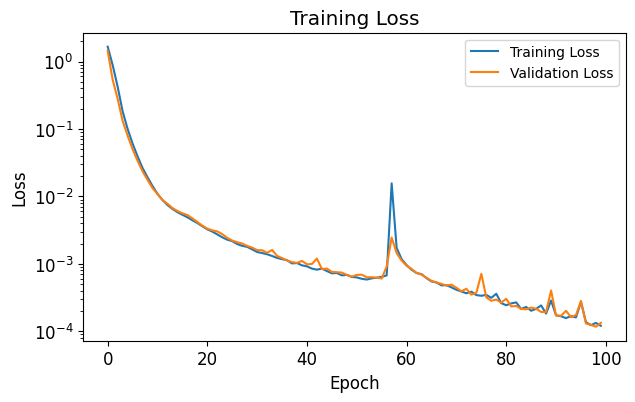

In [5]:
model_symp_eul = PseudoHamiltonianNeuralNetwork(nstates = sys.nstates, S=sys.S,Hamiltonian_estimated = BaseHamiltonianNeuralNetwork(nstates=sys.nstates, act_1 = act_1, act_2 = act_2), initial_condition_sampler = initial_condition)

optimizer_symp_eul = torch.optim.Adam(model_symp_eul.parameters(), lr=lr)
model_symp_eul, trainingdetails_symp_eul = train(model = model_symp_eul,integrator = integrator, train_data = train_data, val_data = val_data,optimizer = optimizer_symp_eul,shuffle=True, epochs = epochs, name_sys = "Kepler")

100%|██████████| 1/1 [00:00<00:00, 66.24it/s]
/Users/sannejamila/Documents/Vår 2025/HenonHeiles/HamiltonianNeuralNetwork_HenonHeiles/NeuralNetworks.py:163: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u0 = torch.tensor(u0,dtype = torch.float32)
/Users/sannejamila/Documents/Vår 2025/HenonHeiles/HamiltonianNeuralNetwork_HenonHeiles/Kepler.py:32: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  H = 1/2*u.T@A@u - 1/np.sqrt(u.T@B@u)


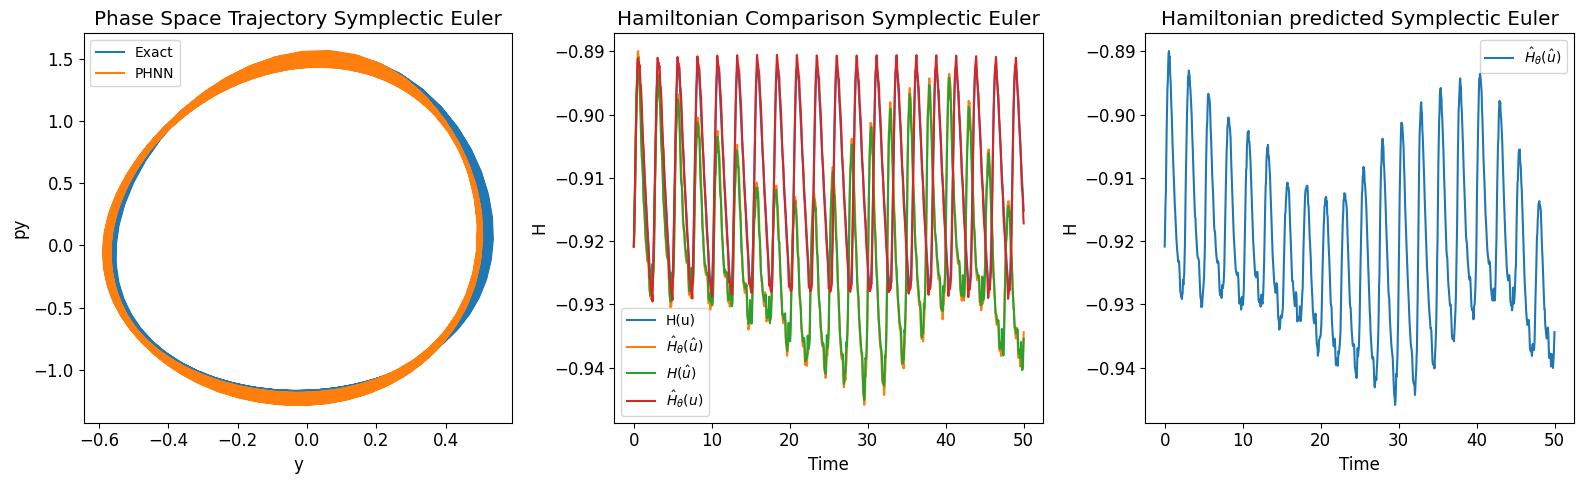

In [6]:
tmax = 5*10
nsamples = 100*10
dt = tmax/nsamples

nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)

ntrajectories = 1
integrator = "symplectic euler"

(u_start, u_end, t_start, t_end, dt, u_ex), dudt, u_exact,t, H0, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)

u_phnn_symp, t_sample = model_symp_eul.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)


fig, ax = plt.subplots(1, 3, figsize=(16, 5))  
y, py = u_exact[0][:, 1], u_exact[0][:, 3]
ax[0].plot(y, py, label="Exact")
y, py = u_phnn_symp[0][:, 1], u_phnn_symp[0][:, 3]
ax[0].plot(y, py, label="PHNN")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[0].set_title("Phase Space Trajectory Symplectic Euler" )
ax[0].legend()


H_exact = torch.tensor([sys.Hamiltonian(u) for u in u_exact.squeeze(0)])

C =model_symp_eul.Hamiltonian(torch.tensor(u0s, dtype = torch.float32))- sys.Hamiltonian(u0s.squeeze(0))


t = t_sample.squeeze(0)
u_samples = u_phnn_symp.squeeze(0)
#Computed estimated Hamiltonian from values for prediction
H_symp_nn= torch.tensor([(model_symp_eul.Hamiltonian(u)- C)for u in u_samples])
#Computed true Hamiltonian values for prediction
H_exact_pred = torch.tensor([sys.Hamiltonian(u) for u in u_samples])
#Computed NN Hamiltonian for exact
H_nn_exact = torch.tensor([(model_symp_eul.Hamiltonian(torch.tensor(u, dtype = torch.float32)) -C) for u in u_exact.squeeze(0)])


ax[1].plot(t, H_exact, label="H(u)")
ax[1].plot(t, H_symp_nn, label=r"$\hat{H}_{\theta}(\hat u)$")
ax[1].plot(t, H_exact_pred, label=r"$H(\hat u)$")
ax[1].plot(t, H_nn_exact, label=r"$\hat{H}_{\theta}(u)$")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("H")
ax[1].set_title("Hamiltonian Comparison Symplectic Euler")
ax[1].legend()

ax[2].plot(t, H_symp_nn, label=r"$\hat{H}_{\theta}(\hat u)$")
ax[2].set_xlabel("Time")
ax[2].set_ylabel("H")
ax[2].set_title("Hamiltonian predicted Symplectic Euler")
ax[2].legend()

plt.tight_layout() 
plt.show()



## Symplectic Midpoint

In [7]:
integrator = "symplectic euler"
(u_start, u_end, t_start, t_end, dt, u_ex), dudt, u_train,t, H0, u0s_train  =  generate_data(system=sys,ntrajectories =ntraj_train, t_sample = t_train,integrator=integrator,u0s_train = u0s_train)
train_data = (u_start, u_end, t_start, t_end, dt, u_ex), dudt

(u_start, u_end, t_start, t_end, dt, u_ex), dudt, u_val,t, H0, u0s_val =  generate_data(system=sys,ntrajectories =ntraj_val, t_sample = t_val, integrator=integrator, u0s_val = u0s_val)
val_data = (u_start, u_end, t_start, t_end, dt, u_ex), dudt

100%|██████████| 750/750 [00:00<00:00, 768.94it/s]


In [8]:

model_symp = PseudoHamiltonianNeuralNetwork(nstates = sys.nstates, S=sys.S,Hamiltonian_estimated = BaseHamiltonianNeuralNetwork(nstates=sys.nstates, act_1 = act_1, act_2 = act_2), initial_condition_sampler = initial_condition)

optimizer_symp = torch.optim.Adam(model_symp.parameters(), lr=lr)
model_symp, trainingdetails_symp = train(model = model_symp,integrator = integrator, train_data = train_data ,val_data = val_data,optimizer = optimizer_symp,shuffle=True, epochs = epochs)


Batch data len:  171
Batch data shape:  torch.Size([1024, 4])


  0%|          | 0/100 [00:00<?, ?it/s]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  1%|          | 1/100 [00:20<33:16, 20.16s/it, epoch=0, loss=0.758]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  2%|▏         | 2/100 [00:35<28:05, 17.20s/it, epoch=1, loss=0.134]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  3%|▎         | 3/100 [00:50<26:22, 16.31s/it, epoch=2, loss=0.105]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  4%|▍         | 4/100 [01:04<24:20, 15.22s/it, epoch=3, loss=0.0436]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  5%|▌         | 5/100 [01:19<23:56, 15.12s/it, epoch=4, loss=0.0191]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  6%|▌         | 6/100 [01:40<26:55, 17.19s/it, epoch=5, loss=0.0117]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  7%|▋         | 7/100 [01:59<27:43, 17.88s/it, epoch=6, loss=0.00817]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  8%|▊         | 8/100 [02:23<30:31, 19.91s/it, epoch=7, loss=0.00615]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


  9%|▉         | 9/100 [02:46<31:31, 20.79s/it, epoch=8, loss=0.00461]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 10%|█         | 10/100 [03:08<31:52, 21.25s/it, epoch=9, loss=0.00367]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 11%|█         | 11/100 [03:30<31:51, 21.48s/it, epoch=10, loss=0.00298]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 12%|█▏        | 12/100 [03:53<32:09, 21.93s/it, epoch=11, loss=0.00245]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 13%|█▎        | 13/100 [04:15<31:44, 21.89s/it, epoch=12, loss=0.00208]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 14%|█▍        | 14/100 [04:36<30:47, 21.48s/it, epoch=13, loss=0.00174]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 15%|█▌        | 15/100 [04:59<31:16, 22.08s/it, epoch=14, loss=0.00153]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 16%|█▌        | 16/100 [05:20<30:31, 21.80s/it, epoch=15, loss=0.00132]

Batch data epoch len:  171
Batch data shape:  torch.Size([1024, 4])


 16%|█▌        | 16/100 [05:23<28:20, 20.25s/it, epoch=15, loss=0.00132]


KeyboardInterrupt: 

100%|██████████| 1/1 [00:00<00:00,  8.45it/s]


tensor([[1.4763]], grad_fn=<SubBackward0>)


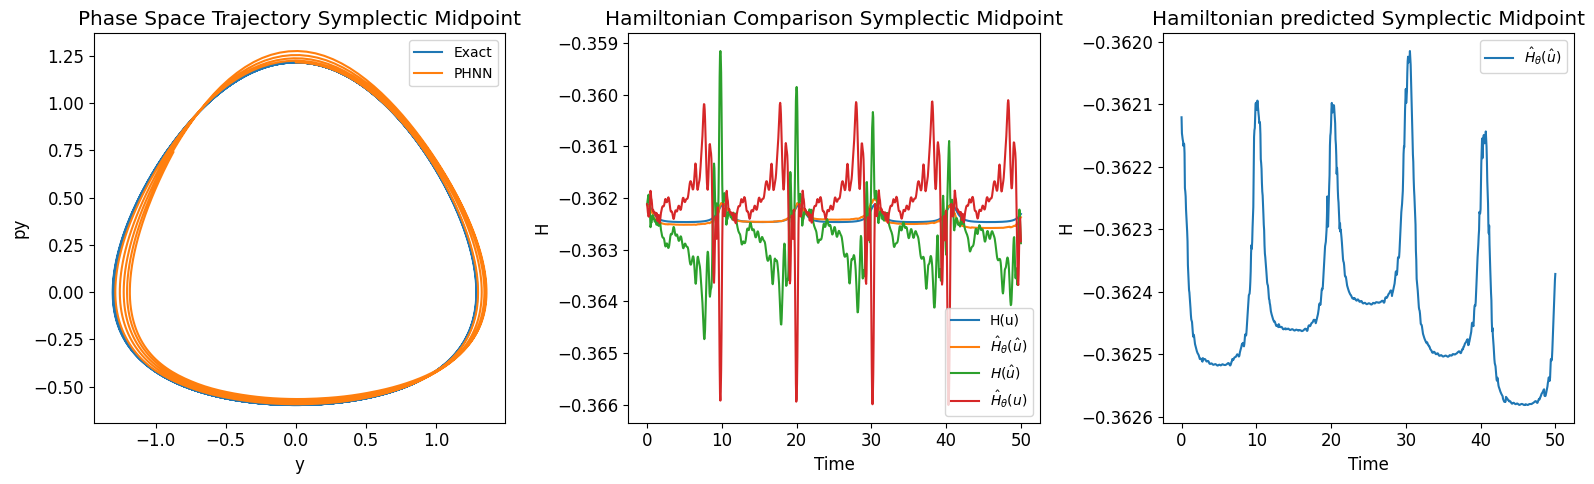

In [45]:
tmax = 5*10
nsamples = 100*10
dt = tmax/nsamples

nt = round(tmax / dt)
t_sample = np.linspace(0, tmax, nt + 1)

ntrajectories = 1
integrator = "symplectic midpoint"

(u_start, u_end, t_start, t_end, dt, u_ex), dudt, u_exact,t, H0, u0s =  generate_data(system=sys,ntrajectories =ntrajectories, t_sample = t_sample,integrator=integrator)

u_phnn_symp, t_sample = model_symp.generate_trajectories(ntrajectories = ntrajectories, t_sample = t_sample,integrator = integrator,u0s=u0s)


fig, ax = plt.subplots(1, 3, figsize=(16, 5))  
y, py = u_exact[0][:, 1], u_exact[0][:, 3]
ax[0].plot(y, py, label="Exact")
y, py = u_phnn_symp[0][:, 1], u_phnn_symp[0][:, 3]
ax[0].plot(y, py, label="PHNN")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[0].set_title("Phase Space Trajectory Symplectic Midpoint")
ax[0].legend()

C =model_symp.Hamiltonian(torch.tensor(u0s, dtype = torch.float32))- sys.Hamiltonian(u0s.squeeze(0))

H_exact = torch.tensor([sys.Hamiltonian(u) for u in u_exact.squeeze(0)])
t = t_sample.squeeze(0)
u_samples = u_phnn_symp.squeeze(0)
#Computed estimated Hamiltonian from values for prediction
H_symp_nn= torch.tensor([(model_symp.Hamiltonian(u) -C)for u in u_samples])
#Computed true Hamiltonian values for prediction
H_exact_pred = torch.tensor([sys.Hamiltonian(u) for u in u_samples])

#Computed NN Hamiltonian for exact
H_nn_exact = torch.tensor([(model_symp.Hamiltonian(torch.tensor(u, dtype = torch.float32))-C) for u in u_exact.squeeze(0)])

print(C)

ax[1].plot(t, H_exact, label="H(u)")
ax[1].plot(t, H_symp_nn, label=r"$\hat{H}_{\theta}(\hat u)$")
ax[1].plot(t, H_exact_pred,  label=r"$H(\hat u)$")
ax[1].plot(t, H_nn_exact, label=r"$\hat{H}_{\theta}(u)$")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("H")
ax[1].set_title("Hamiltonian Comparison Symplectic Midpoint")
ax[1].legend()



ax[2].plot(t, H_symp_nn, label=r"$\hat{H}_{\theta}(\hat u)$")
ax[2].set_xlabel("Time")
ax[2].set_ylabel("H")
ax[2].set_title("Hamiltonian predicted Symplectic Midpoint")
ax[2].legend()

plt.tight_layout() 
plt.show()

In [41]:

C =model_symp.Hamiltonian(torch.tensor(u0s, dtype = torch.float32))- sys.Hamiltonian(u0s.squeeze(0))

print(C)
print(u0s)
sys.Hamiltonian(u0s.squeeze(0))

tensor([[1.4775]], grad_fn=<SubBackward0>)
[[0.36995636 0.         0.         1.9339431 ]]


np.float64(-0.8329535435336817)

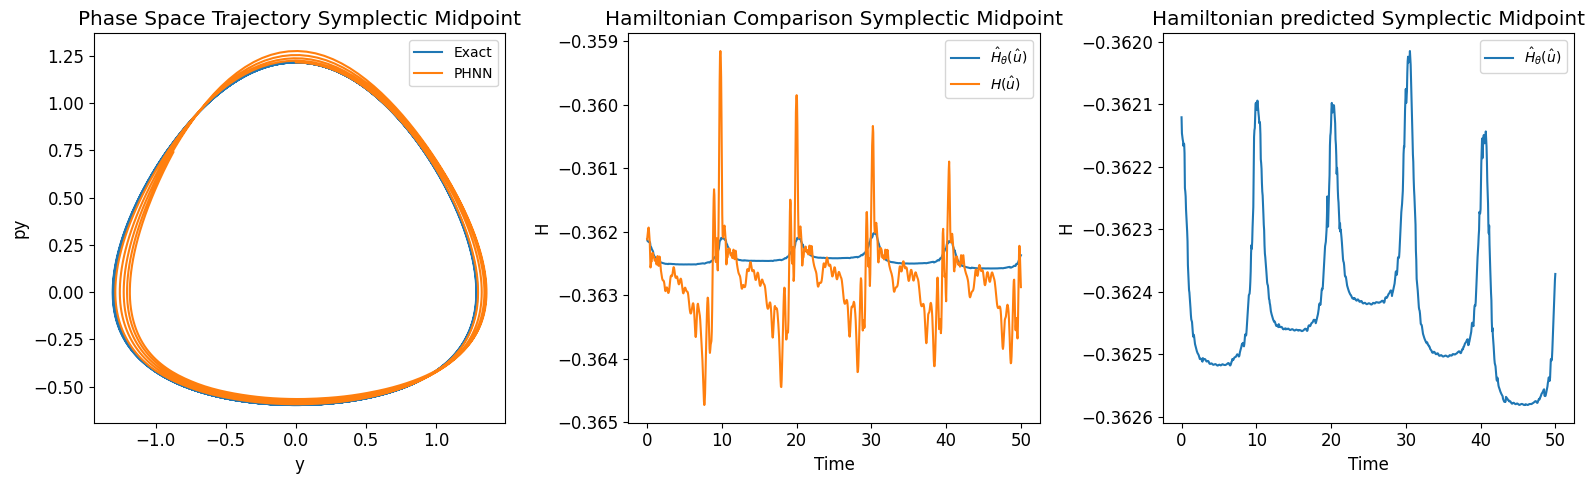

In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(16, 5))  
y, py = u_exact[0][:, 1], u_exact[0][:, 3]
ax[0].plot(y, py, label="Exact")
y, py = u_phnn_symp[0][:, 1], u_phnn_symp[0][:, 3]
ax[0].plot(y, py, label="PHNN")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[0].set_title("Phase Space Trajectory Symplectic Midpoint")
ax[0].legend()


#ax[1].plot(t, H_exact, label="H(u)")
ax[1].plot(t, H_symp_nn, label=r"$\hat{H}_{\theta}(\hat u)$")
ax[1].plot(t, H_exact_pred,  label=r"$H(\hat u)$")
#ax[1].plot(t, H_nn_exact, label=r"$\hat{H}_{\theta}(u)$")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("H")
ax[1].set_title("Hamiltonian Comparison Symplectic Midpoint")
ax[1].legend()



ax[2].plot(t, H_symp_nn, label=r"$\hat{H}_{\theta}(\hat u)$")
ax[2].set_xlabel("Time")
ax[2].set_ylabel("H")
ax[2].set_title("Hamiltonian predicted Symplectic Midpoint")
ax[2].legend()

plt.tight_layout() 
plt.show()